# Simple Statistics

Typografen richtten vanaf 1837 in verschillende steden in Nederland een vereniging op voor onderlinge hulp bij ziekte en voor het organiseren van het Kopperfeest op de eerste maandag na Driekoningen, maar ook andere gelegenheden. Bij feesten zongen zij eigen geschreven teksten op bekende melodieen. Ik probeer zoveel mogelijk van deze teksten, in ieder geval tot 1869 machineleesbaar in te voeren. Daarbij houd ik een CSV-bestand bij van alle liedjes, met daarin de volgende velden: (item,id,titel,wijze,jaartal,schrijver,vereniging_schrijver)

* Identifier van het liedje, opgebouwd uit een code voor de typografische vereniging (indien van toepassing), het titelwoord van het boekje, het jaartal van uitgave en het volgnummer van het liedje in het bewust boekje.
* Titel van het liedje
* Wijze van de melodie
* Jaartal van schrijven
* Schrijver
* Vereniging van de schrijver

Deze notebook geeft een overzicht van de data die ik weet over de liedjes (die tot nu toe zijn ingevoerd). Allereerst lees ik de data in een pandas dataframe.

In [2]:
import pandas as pd

df = pd.read_csv("data/liedjes.csv")

Ik wil een overzicht van het aantal liedjes per jaar en per vereniging. Maar eerst: hoeveel liedjes zijn er in totaal en van hoeveel weten we het jaartal en van hoeveel weten we de vereniging.

In [3]:
len(df)

759

In [4]:
df['jaartal'].count()

753

In [5]:
df['vereniging_schrijver'].count()

755

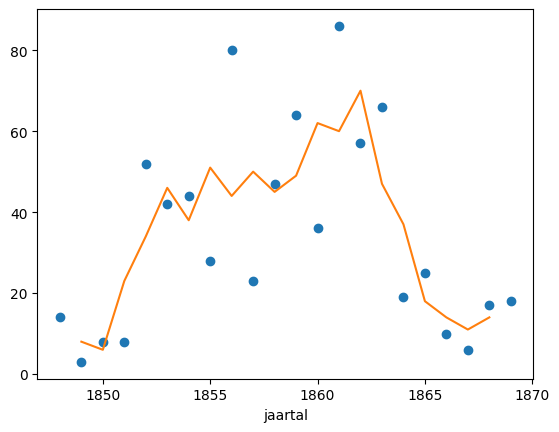

In [6]:
count = df.groupby('jaartal').size()

# Bepaal drie jarige lopende gemiddelde
runAvg = {}
year = 1849
while year < 1869:
    runAvg[year] = round((count.get(year - 1) + count.get(year) + count.get(year + 1)) / 3)
    year = year + 1

# plot gemiddelden
import matplotlib.pylab as plt

count.plot(style = "o")

lists = sorted(runAvg.items())
x, y = zip(*lists)
plt.plot(x, y)


In [7]:
df.groupby(['typoID','jaartal']).size()

typoID         jaartal
amsterdam1847  1848.0     12
amsterdam1849  1851.0      6
               1852.0     22
               1857.0     16
               1858.0     13
                          ..
utrecht1851    1864.0      9
               1866.0     10
               1867.0      6
               1868.0     15
               1869.0     10
Length: 67, dtype: int64

Nu per vereniging:

<AxesSubplot: xlabel='vereniging_schrijver'>

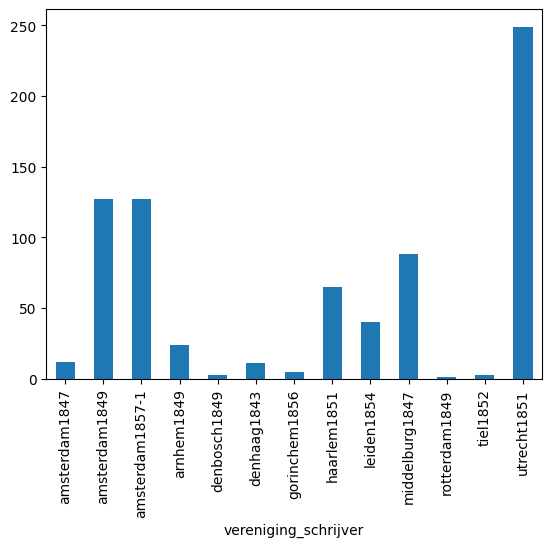

In [8]:
# df['vereniging_schrijver'].value_counts().plot(kind = 'bar')

df.groupby('vereniging_schrijver').size().plot(kind = "bar") 

Welke auteurs hebben 10 of meer liedjes geschreven?

In [9]:
df['schrijver'].value_counts().loc[lambda x : x > 9]

C. Mommaas             47
M. Smidt               38
J.H.C. Venman          31
B. Lageman             23
W. Farber              14
J.C. Paap              12
J.J. van Stempfoort    12
P.G. van de Kamp       11
P. Werthweijn          11
J. Breeman             10
Name: schrijver, dtype: int64

In [10]:
df['wijze'].value_counts().loc[lambda x : x > 9]

Wien Neerlands bloed                       105
Henri's drinklied                           66
De wereld is in rep en roer                 50
Io Vivat                                    45
De Koning leef                              24
Wie praalt aan 't hoofd der Heldenstoet     17
Eens werd er aan de zeeuwsche kust          16
Schep vreugde in 't leven                   14
God save the king                           12
Schilder! ‘k wou mij zelv’ eens zien        10
Name: wijze, dtype: int64